# FFNN

In [4]:
import pandas as pd
import numpy as np

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as ex

#For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#For model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#For model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'plotly.io'

In [21]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# Chuẩn hóa dữ liệu

In [25]:
cat_cols = df[['caa', 'cp', 'restecg', 'exng', 'sex', 'output']].copy()
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [26]:
num_cols = df[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']].copy()
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,63,145,1,150,2.3,0,1,233
1,37,130,0,187,3.5,0,2,250
2,41,130,0,172,1.4,2,2,204
3,56,120,0,178,0.8,2,2,236
4,57,120,0,163,0.6,2,2,354


In [27]:
sc = StandardScaler()
le = LabelEncoder()

In [28]:
for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])
        
sc_num_cols = sc.fit_transform(num_cols)
num_cols = pd.DataFrame(sc_num_cols,columns = num_cols.columns)

In [29]:
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [30]:
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050


In [50]:
df_final = pd.concat([num_cols,cat_cols],axis = 1)
df_final.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol,caa,cp,restecg,exng,sex,output
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334,0,3,0,0,1,1
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199,0,2,1,0,1,1
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773,0,1,0,0,0,1
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357,0,1,1,0,1,1
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050,0,0,1,1,0,1


# Huấn luyện

In [1]:
X = df_final.drop("output",axis = 1)
y = df_final.output

NameError: name 'df_final' is not defined

In [2]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=142, stratify=y)

NameError: name 'train_test_split' is not defined

In [1]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']]
X_train.head()

NameError: name 'X_train' is not defined

# Reccurent Neural Network 

In [42]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import classification_report, accuracy_score

In [43]:
# Xây dựng mô hình RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dense(1, activation='sigmoid'))

In [44]:
# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
# Reshape dữ liệu để phù hợp với đầu vào của mô hình RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [46]:
# Huấn luyện mô hình
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=40, batch_size=32, validation_data=(X_test_rnn, y_test))


Epoch 1/40
7/7 [==============================] - 1s 31ms/step - loss: 0.6801 - accuracy: 0.5472 - val_loss: 0.6610 - val_accuracy: 0.5714
Epoch 2/40
7/7 [==============================] - 0s 6ms/step - loss: 0.6342 - accuracy: 0.6368 - val_loss: 0.6248 - val_accuracy: 0.6923
Epoch 3/40
7/7 [==============================] - 0s 7ms/step - loss: 0.5927 - accuracy: 0.7877 - val_loss: 0.5835 - val_accuracy: 0.7912
Epoch 4/40
7/7 [==============================] - 0s 6ms/step - loss: 0.5481 - accuracy: 0.8160 - val_loss: 0.5335 - val_accuracy: 0.7912
Epoch 5/40
7/7 [==============================] - 0s 6ms/step - loss: 0.4802 - accuracy: 0.8160 - val_loss: 0.4628 - val_accuracy: 0.7582
Epoch 6/40
7/7 [==============================] - 0s 7ms/step - loss: 0.4169 - accuracy: 0.8208 - val_loss: 0.4370 - val_accuracy: 0.7802
Epoch 7/40
7/7 [==============================] - 0s 7ms/step - loss: 0.4179 - accuracy: 0.8255 - val_loss: 0.4209 - val_accuracy: 0.7912
Epoch 8/40
7/7 [=================

In [47]:
# Đánh giá mô hình
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_rnn = [1 if y >= 0.5 else 0 for y in y_pred_rnn]
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)

print("RNN Model Accuracy: %.2f%%" % (accuracy_rnn * 100))
print(classification_report(y_test, y_pred_rnn))

3/3 [==============================] - 0s 2ms/step
RNN Model Accuracy: 80.22%
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



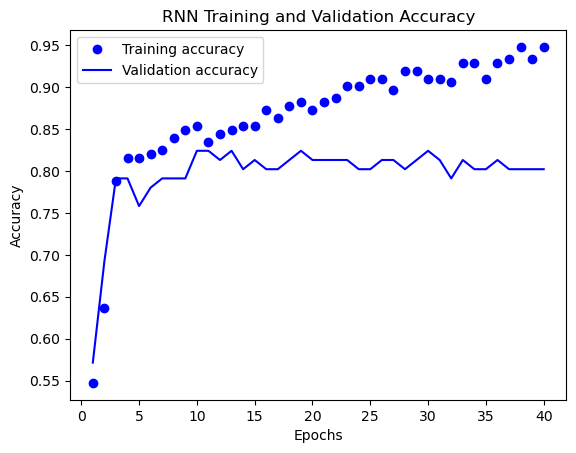

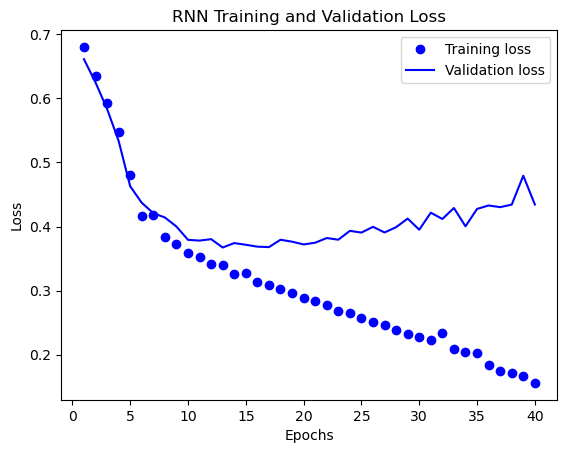

In [48]:
# Lấy thông tin lịch sử của RNN
accuracy_rnn = history_rnn.history['accuracy']
val_accuracy_rnn = history_rnn.history['val_accuracy']
loss_rnn = history_rnn.history['loss']
val_loss_rnn = history_rnn.history['val_loss']
epochs_rnn = range(1, len(accuracy_rnn) + 1)

# Vẽ đồ thị cho độ chính xác
plt.plot(epochs_rnn, accuracy_rnn, 'bo', label='Training accuracy')
plt.plot(epochs_rnn, val_accuracy_rnn, 'b', label='Validation accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Vẽ đồ thị cho mất mát
plt.plot(epochs_rnn, loss_rnn, 'bo', label='Training loss')
plt.plot(epochs_rnn, val_loss_rnn, 'b', label='Validation loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# So sánh

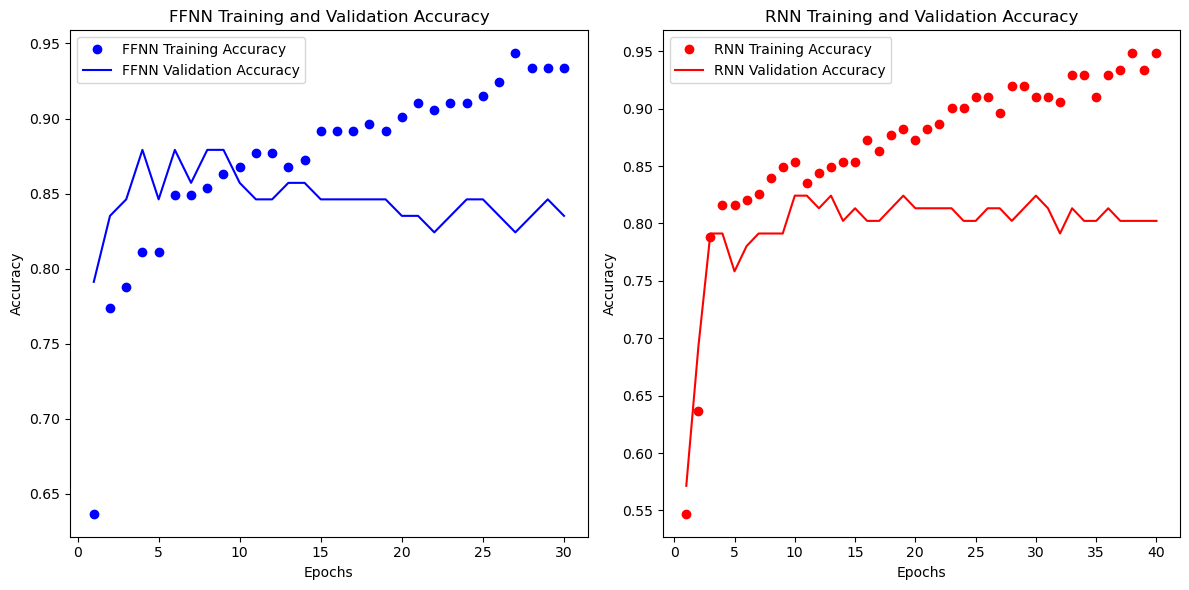

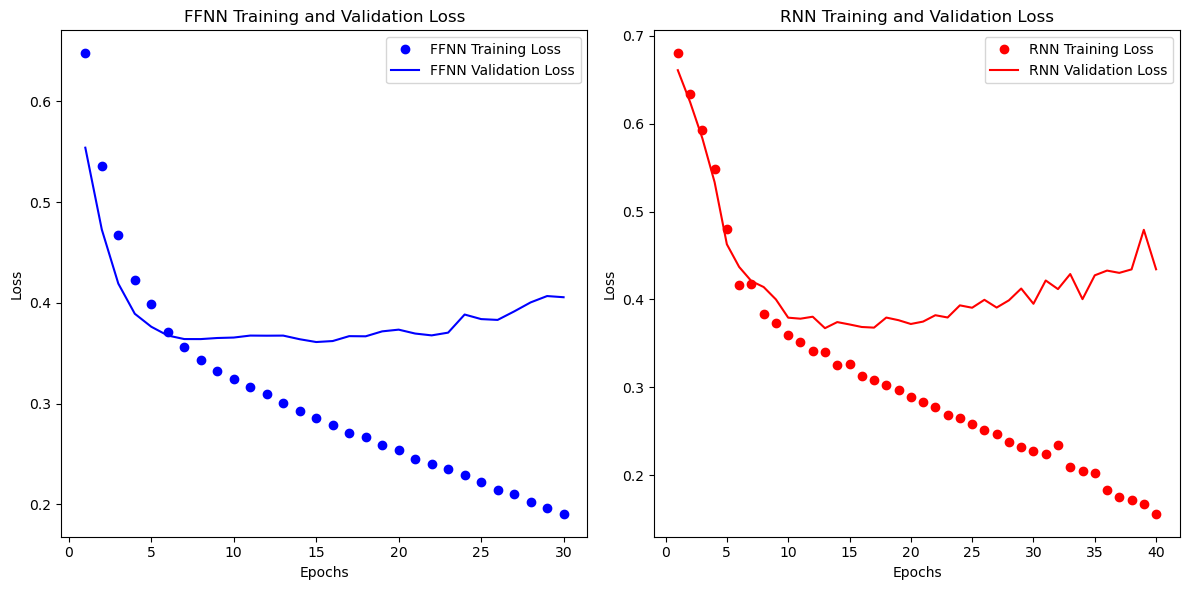

In [49]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho độ chính xác
plt.figure(figsize=(12, 6))

# Biểu đồ cho FFNN
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='FFNN Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='FFNN Validation Accuracy')
plt.title('FFNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Biểu đồ cho RNN
plt.subplot(1, 2, 2)
plt.plot(epochs_rnn, accuracy_rnn, 'ro', label='RNN Training Accuracy')
plt.plot(epochs_rnn, val_accuracy_rnn, 'r', label='RNN Validation Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho mất mát
plt.figure(figsize=(12, 6))

# Biểu đồ cho FFNN
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='FFNN Training Loss')
plt.plot(epochs, val_loss, 'b', label='FFNN Validation Loss')
plt.title('FFNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ cho RNN
plt.subplot(1, 2, 2)
plt.plot(epochs_rnn, loss_rnn, 'ro', label='RNN Training Loss')
plt.plot(epochs_rnn, val_loss_rnn, 'r', label='RNN Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
